In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# setup all the imports
import matplotlib.font_manager
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  # noqa: E402
import numpy as np
import seaborn as sns
import pandas as pd

flist = matplotlib.font_manager.get_font_names()
from pathlib import Path  # noqa: E402

from extremeweatherbench import cases, defaults, evaluate  # noqa: E402

# make the basepath - change this to your local path
basepath = Path.home() / "extreme-weather-bench-paper" / ""
basepath = str(basepath) + "/"

# ugly hack to load in our plotting scripts
# import sys  # noqa: E402

#sys.path.append(basepath + "/docs/notebooks/")
import src.plots.paper_plotting as pp  # noqa: E402


In [46]:

# load in all of the events in the yaml file
print("loading in the events yaml file")
ewb_cases = cases.load_ewb_events_yaml_into_case_collection()
# build out all of the expected data to evalate the case
# this will not be a 1-1 mapping with ewb_cases because there are multiple data sources
# to evaluate for some cases
# for example, a heat/cold case will have both a case operator for ERA-5 data and GHCN
case_operators = cases.build_case_operators(
    ewb_cases, defaults.get_brightband_evaluation_objects()
)


loading in the events yaml file


In [71]:
ewb_cases.cases

[IndividualCase(case_id_number=1, title='2021 Pacific Northwest', start_date=datetime.datetime(2021, 6, 20, 0, 0), end_date=datetime.datetime(2021, 7, 3, 0, 0), location=BoundingBoxRegion(latitude_min=33.25, latitude_max=68.0, longitude_min=215.25, longitude_max=256.0), event_type='heat_wave'),
 IndividualCase(case_id_number=2, title='2022 Upper Midwest', start_date=datetime.datetime(2022, 5, 7, 0, 0), end_date=datetime.datetime(2022, 5, 17, 0, 0), location=BoundingBoxRegion(latitude_min=19.5, latitude_max=48.25, longitude_min=252.0, longitude_max=276.75), event_type='heat_wave'),
 IndividualCase(case_id_number=3, title='2022 California', start_date=datetime.datetime(2022, 6, 7, 0, 0), end_date=datetime.datetime(2022, 6, 15, 0, 0), location=BoundingBoxRegion(latitude_min=23.75, latitude_max=44.5, longitude_min=235.75, longitude_max=266.25), event_type='heat_wave'),
 IndividualCase(case_id_number=4, title='2022 Texas', start_date=datetime.datetime(2022, 6, 30, 0, 0), end_date=datetime.d

dict_values([0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 4, 0, 0, 0, 3, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 4, 0, 0, 0, 4, 1, 0, 0, 0, 4, 1, 2, 0, 0, 6, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 3, 2, 0, 0, 1, 2, 0, 0, 0, 6, 2, 0, 0, 0, 3, 1, 1, 0, 0, 2, 3, 1, 0, 0, 0, 0, 1, 0, 0, 2, 4, 2, 1, 0, 1, 1, 3, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0, 4, 0, 1, 3, 1, 1, 0, 0, 7, 0, 1, 0, 1, 0, 1, 0, 0, 6, 0, 0, 0, 0, 4, 0, 2, 0, 0, 1, 0, 3, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 3, 0, 0, 1, 1, 2, 0, 2, 4, 0, 0, 0, 1, 14, 1, 3, 0, 3, 6, 0, 2, 0, 6, 3, 0, 1, 0, 3, 0, 0, 0, 0, 6, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 3, 1, 0, 3, 2, 1, 2, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 2, 0, 3, 2, 3, 0, 1, 6, 0, 3, 0, 1, 3, 0, 6, 0, 3, 5, 0, 4, 0, 4, 3, 0, 0, 0, 6, 0, 1, 0, 0, 2, 3, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (300, 3) and arg 1 with shape (300,).

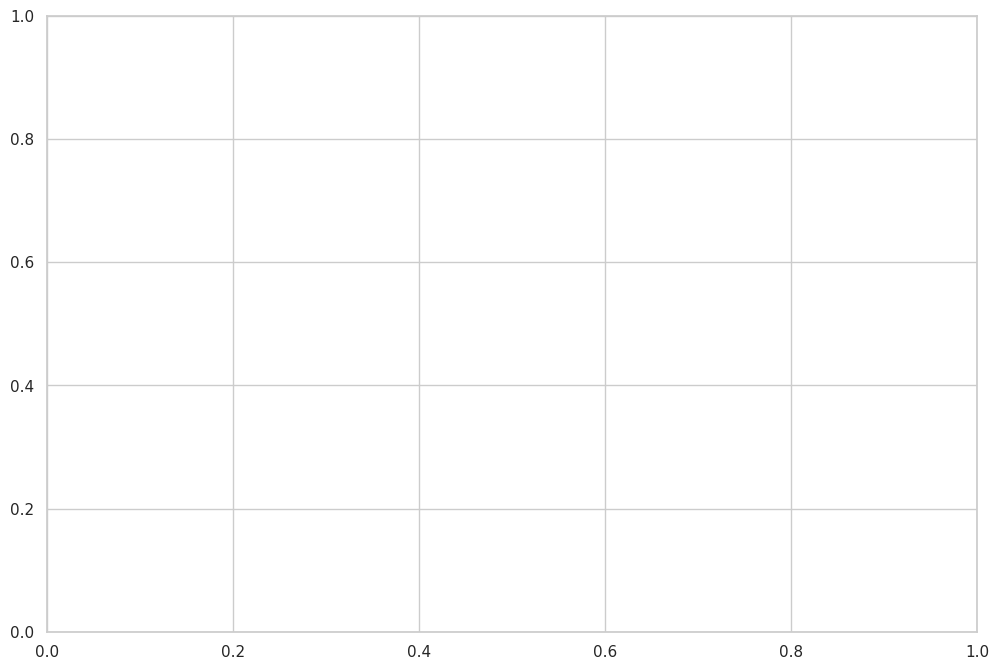

In [ ]:
counts_by_month_and_type = {}
years = range(2020, 2025)
months = range(1, 13)
event_types = ['heat_wave', 'freeze', 'tropical_cyclone', 'severe_convection', 'atmospheric_river']
for year in years:
    for month in months:
        for event_type in event_types:
            counts_by_month_and_type[(year, month, event_type)] = 0

for case in ewb_cases.cases:
    counts_by_month_and_type[(case.start_date.year, case.start_date.month, case.event_type)] += 1

# print all dates with counts greater than 0
# for date, count in counts_by_month_and_type.items():
#     if count > 0:
#         print(date, count)

# make a stacked bar chart of the counts by month and event type
plt.figure(figsize=(12, 8))
plt.bar(counts_by_month_and_type.keys(), counts_by_month_and_type.values())
plt.show()



In [47]:

# to plot the targets, we need to run the pipeline for each case and target
from joblib import Parallel, delayed  # noqa: E402
from joblib.externals.loky import get_reusable_executor  # noqa: E402

# load in all the case info (note this takes awhile in non-parallel form as it has to
# run all the target information for each case)
# this will return a list of tuples with the case id and the target dataset

print("running the pipeline for each case and target")
parallel = Parallel(n_jobs=32, return_as="generator", backend="loky")
case_operators_with_targets_established_generator = parallel(
    delayed(
        lambda co: (
            co.case_metadata.case_id_number,
            evaluate.run_pipeline(co.case_metadata, co.target),
        )
    )(case_operator)
    for case_operator in case_operators
)
case_operators_with_targets_established = list(
    case_operators_with_targets_established_generator
)
# this will throw a bunch of errors below but they're not consequential. this releases
# the memory as it shuts down the workers
get_reusable_executor().shutdown(wait=True)


running the pipeline for each case and target


/home/amy/extreme-weather-bench-paper/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [50]:
# make a global color palatte so things are consistent across plots
sns_palette = sns.color_palette("tab10")
sns.set_style("whitegrid")

accessible_colors = [
    "#3394D6",  # blue
    "#E09000",  #  orange "#E69F00",  # orange
    "#A15A7E",  # "#CC79A7",  # reddish purple
    "#CC4A4A",  #  vermillion"#D55E00",  # vermillion
    "#A0A0A0",  # Grey "#000000",  # black
    "#B2B24D",  # Olive
    "#33B890",  # bluish green
    "#78C6F1",  # sky blue
    "#F0E442",  # yellow
]

# defaults for plotting
fourv2_style = {'color': accessible_colors[0]}
gc_style = {'color': accessible_colors[2]}
pangu_style = {'color': accessible_colors[3]}
hres_style = {'color': 'black'}

# the group styles and settings so that we can just easily grab them for the plots and they are globally consistent

ghcn_group_style = {'linestyle':'-', 'marker':'o', 'group':'GHCN'}
era5_group_style = {'linestyle':'--', 'marker':'s', 'group':'ERA5'}

ifs_group_style = {'linestyle':'-', 'marker':'o', 'group':'IFS'}
gfs_group_style = {'linestyle':':', 'marker':'d', 'group':'GFS'}

global_group_style = {'linestyle':'--', 'marker':'*', 'group':'Global'}

hres_group_style = {'linestyle':'-', 'marker':'.', 'group':'HRES'}

# settings for the different models
fourv2_ifs_cira_settings = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2'} 
fourv2_gfs_cira_settings = {'forecast_source':'CIRA FOURv2 GFS', 'label_str': 'ForecastNet V2'} 
gc_ifs_cira_settings = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast'} 
gc_gfs_cira_settings = {'forecast_source':'CIRA GC GFS', 'label_str': 'GraphCast'} 
pangu_ifs_cira_settings = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather'} 
pangu_gfs_cira_settings = {'forecast_source':'CIRA PANG GFS', 'label_str': 'Pangu Weather'} 

hres_ifs_settings = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES'} 

severe_tp_settings = {'linestyle':'-', 'marker':'o', 'group':'True Positives'}
severe_fn_settings = {'linestyle':'--', 'marker':'x', 'group':'False Negatives'}


In [51]:
# load the results back in
fourv2_heat_results = pd.read_pickle(basepath + 'saved_data/fourv2_heat_results.pkl')
pang_heat_results = pd.read_pickle(basepath + 'saved_data/pang_heat_results.pkl')
hres_heat_results = pd.read_pickle(basepath + 'saved_data/hres_heat_results.pkl')
gc_heat_results = pd.read_pickle(basepath + 'saved_data/gc_heat_results.pkl')


fourv2_freeze_results = pd.read_pickle(basepath + 'saved_data/fourv2_freeze_results.pkl')
pang_freeze_results = pd.read_pickle(basepath + 'saved_data/pang_freeze_results.pkl')
hres_freeze_results = pd.read_pickle(basepath + 'saved_data/hres_freeze_results.pkl')
gc_freeze_results = pd.read_pickle(basepath + 'saved_data/gc_freeze_results.pkl')

fourv2_severe_results = pd.read_pickle(basepath + 'saved_data/fourv2_severe_results.pkl')
pang_severe_results = pd.read_pickle(basepath + 'saved_data/pang_severe_results.pkl')
hres_severe_results = pd.read_pickle(basepath + 'saved_data/hres_severe_results.pkl')
gc_severe_results = pd.read_pickle(basepath + 'saved_data/gc_severe_results.pkl')


In [52]:
# plot ERA5 versus GHCN for IFS
fourv2_ifs_ghcn_settings = fourv2_ifs_cira_settings | fourv2_style | ghcn_group_style
gc_ifs_ghcn_settings = gc_ifs_cira_settings | gc_style | ghcn_group_style
pangu_ifs_ghcn_settings = pangu_ifs_cira_settings | pangu_style | ghcn_group_style
hres_ghcn_settings = hres_ifs_settings | hres_style | ghcn_group_style

fourv2_ifs_era5_settings = fourv2_ifs_cira_settings | fourv2_style | era5_group_style
gc_ifs_era5_settings = gc_ifs_cira_settings | gc_style | era5_group_style
pangu_ifs_era5_settings = pangu_ifs_cira_settings | pangu_style | era5_group_style
hres_era5_settings = hres_ifs_settings | hres_style | era5_group_style

# subset the data for the plots
fourv2_heat_ifs_ghcn_plot = pp.subset_results_to_xarray(results_df=fourv2_heat_results, forecast_source=fourv2_ifs_ghcn_settings['forecast_source'], 
                                                     target_source='GHCN', metric='RootMeanSquaredError', init_time='zeroz')
gc_heat_ifs_ghcn_plot = pp.subset_results_to_xarray(results_df=gc_heat_results, forecast_source=gc_ifs_ghcn_settings['forecast_source'], 
                                                 target_source='GHCN', metric='RootMeanSquaredError', init_time='zeroz')
pangu_heat_ifs_ghcn_plot = pp.subset_results_to_xarray(results_df=pang_heat_results, forecast_source=pangu_ifs_ghcn_settings['forecast_source'],
                                           target_source='GHCN', metric='RootMeanSquaredError', init_time='zeroz')
hres_heat_ghcn_plot = pp.subset_results_to_xarray(results_df=hres_heat_results, forecast_source=hres_ghcn_settings['forecast_source'], 
                                    target_source='GHCN', metric='RootMeanSquaredError', init_time='zeroz')

fourv2_heat_ifs_era5_plot = pp.subset_results_to_xarray(results_df=fourv2_heat_results, forecast_source=fourv2_ifs_era5_settings['forecast_source'], 
                                                     target_source='ERA5', metric='RootMeanSquaredError', init_time='zeroz')
gc_heat_ifs_era5_plot = pp.subset_results_to_xarray(results_df=gc_heat_results, forecast_source=gc_ifs_era5_settings['forecast_source'], 
                                                 target_source='ERA5', metric='RootMeanSquaredError', init_time='zeroz')
pangu_heat_ifs_era5_plot = pp.subset_results_to_xarray(results_df=pang_heat_results, forecast_source=pangu_ifs_era5_settings['forecast_source'],
                                           target_source='ERA5', metric='RootMeanSquaredError', init_time='zeroz')
hres_heat_era5_plot = pp.subset_results_to_xarray(results_df=hres_heat_results, forecast_source=hres_era5_settings['forecast_source'], 
                                    target_source='ERA5', metric='RootMeanSquaredError', init_time='zeroz')

# plot the results
heat_data = [fourv2_heat_ifs_ghcn_plot, fourv2_heat_ifs_era5_plot, gc_heat_ifs_ghcn_plot, gc_heat_ifs_era5_plot, 
    pangu_heat_ifs_ghcn_plot, pangu_heat_ifs_era5_plot, hres_heat_ghcn_plot, hres_heat_era5_plot]
heat_settings = [fourv2_ifs_ghcn_settings, fourv2_ifs_era5_settings, gc_ifs_ghcn_settings, 
    gc_ifs_era5_settings, pangu_ifs_ghcn_settings, pangu_ifs_era5_settings, hres_ghcn_settings, hres_era5_settings]

# grab the freeze results
# subset the data for the plots
fourv2_freeze_ifs_ghcn_plot = pp.subset_results_to_xarray(results_df=fourv2_freeze_results, forecast_source=fourv2_ifs_ghcn_settings['forecast_source'], 
                                                     target_source='GHCN', metric='RootMeanSquaredError', init_time='zeroz')
gc_freeze_ifs_ghcn_plot = pp.subset_results_to_xarray(results_df=gc_freeze_results, forecast_source=gc_ifs_ghcn_settings['forecast_source'], 
                                                 target_source='GHCN', metric='RootMeanSquaredError', init_time='zeroz')
pangu_freeze_ifs_ghcn_plot = pp.subset_results_to_xarray(results_df=pang_freeze_results, forecast_source=pangu_ifs_ghcn_settings['forecast_source'],
                                           target_source='GHCN', metric='RootMeanSquaredError', init_time='zeroz')
hres_freeze_ghcn_plot = pp.subset_results_to_xarray(results_df=hres_freeze_results, forecast_source=hres_ghcn_settings['forecast_source'], 
                                    target_source='GHCN', metric='RootMeanSquaredError', init_time='zeroz')

fourv2_freeze_ifs_era5_plot = pp.subset_results_to_xarray(results_df=fourv2_freeze_results, forecast_source=fourv2_ifs_era5_settings['forecast_source'], 
                                                     target_source='ERA5', metric='RootMeanSquaredError', init_time='zeroz')
gc_freeze_ifs_era5_plot = pp.subset_results_to_xarray(results_df=gc_freeze_results, forecast_source=gc_ifs_era5_settings['forecast_source'], 
                                                 target_source='ERA5', metric='RootMeanSquaredError', init_time='zeroz')
pangu_freeze_ifs_era5_plot = pp.subset_results_to_xarray(results_df=pang_freeze_results, forecast_source=pangu_ifs_era5_settings['forecast_source'],
                                           target_source='ERA5', metric='RootMeanSquaredError', init_time='zeroz')
hres_freeze_era5_plot = pp.subset_results_to_xarray(results_df=hres_freeze_results, forecast_source=hres_era5_settings['forecast_source'], 
                                    target_source='ERA5', metric='RootMeanSquaredError', init_time='zeroz')

# plot the results
freeze_data = [fourv2_freeze_ifs_ghcn_plot, fourv2_freeze_ifs_era5_plot, gc_freeze_ifs_ghcn_plot, gc_freeze_ifs_era5_plot, 
    pangu_freeze_ifs_ghcn_plot, pangu_freeze_ifs_era5_plot, hres_freeze_ghcn_plot, hres_freeze_era5_plot]
freeze_settings = [fourv2_ifs_ghcn_settings, fourv2_ifs_era5_settings, gc_ifs_ghcn_settings, 
    gc_ifs_era5_settings, pangu_ifs_ghcn_settings, pangu_ifs_era5_settings, hres_ghcn_settings, hres_era5_settings]



In [57]:
fourv2_gfs_era5_settings_tp = fourv2_gfs_cira_settings | fourv2_style | severe_tp_settings 
gc_gfs_era5_settings_tp  = gc_gfs_cira_settings | gc_style | severe_tp_settings 
pangu_gfs_era5_settings_tp = pangu_gfs_cira_settings | pangu_style | severe_tp_settings 
hres_era5_settings_tp = hres_ifs_settings | hres_style | severe_tp_settings 

# grab the severe results
# fourv2_severe_plot_tp = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
#     forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
#     target_source='local_storm_reports', metric='TruePositives', init_time='zeroz')
gc_severe_plot_tp = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz')
pangu_severe_plot_tp  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz')
hres_severe_plot_tp = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz')

# plot the results
severe_data_tp = [gc_severe_plot_tp, pangu_severe_plot_tp, hres_severe_plot_tp]
severe_settings_tp = [gc_gfs_era5_settings_tp, 
    pangu_gfs_era5_settings_tp, hres_era5_settings_tp]


fourv2_gfs_era5_settings_fn = fourv2_gfs_cira_settings | fourv2_style | severe_fn_settings 
gc_gfs_era5_settings_fn  = gc_gfs_cira_settings | gc_style | severe_fn_settings 
pangu_gfs_era5_settings_fn = pangu_gfs_cira_settings | pangu_style | severe_fn_settings 
hres_era5_settings_fn = hres_ifs_settings | hres_style | severe_fn_settings 
print(gc_gfs_era5_settings_fn)

# grab the results for the false negatives
# fourv2_severe_plot_fn = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
#     forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
#     target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz')
gc_severe_plot_fn = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz')
pangu_severe_plot_fn = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz')
hres_severe_plot_fn = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz')

# plot the results
severe_data_fn = [gc_severe_plot_fn, pangu_severe_plot_fn, hres_severe_plot_fn]
severe_settings_fn = [gc_gfs_era5_settings_fn, 
    pangu_gfs_era5_settings_fn, hres_era5_settings_fn]

{'forecast_source': 'CIRA GC GFS', 'label_str': 'GraphCast', 'color': '#A15A7E', 'linestyle': '--', 'marker': 'x', 'group': 'False Negatives'}


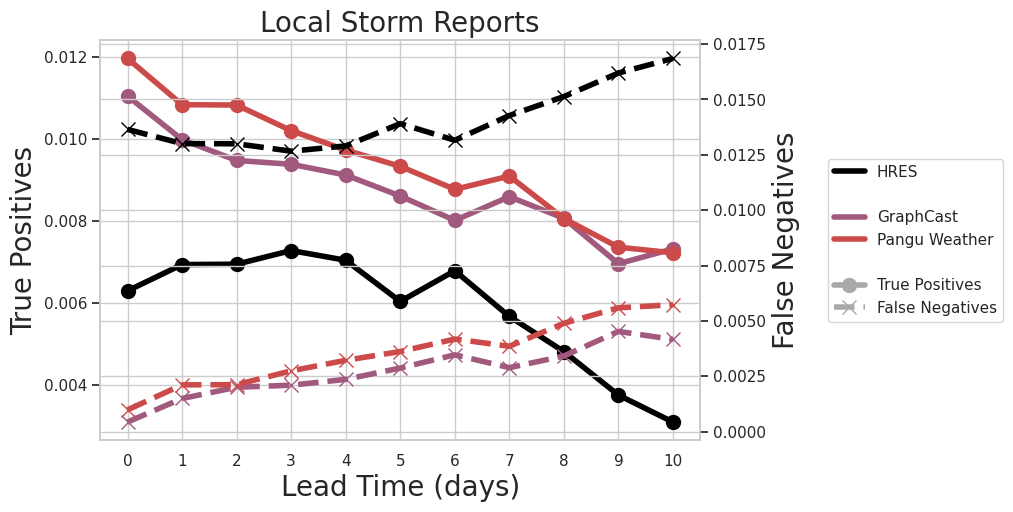

In [61]:
# pp.plot_results_by_metric(data=severe_data_tp, settings=severe_settings_tp, 
#     title='True Positives Local Storm Reports', show_all_in_legend=False)
# pp.plot_results_by_metric(data=severe_data_fn, settings=severe_settings_fn, 
#     title='False Negatives Local Storm Reports', show_all_in_legend=False)
pp.plot_two_results_by_metric(data1=severe_data_tp, data2=severe_data_fn, 
    settings1=severe_settings_tp, settings2=severe_settings_fn, 
    y_label1='True Positives', y_label2='False Negatives',
    title='Local Storm Reports', show_all_in_legend=False)


(30, 30)
plotting the cases for each event type
Error stacking sparse data for 36 from dimensions latitude, longitude: module 'extremeweatherbench.utils' has no attribute 'stack_sparse_data_from_dims'. This is likely because the data is not available for this case.
Error stacking sparse data for 37 from dimensions latitude, longitude: module 'extremeweatherbench.utils' has no attribute 'stack_sparse_data_from_dims'. This is likely because the data is not available for this case.
Error stacking sparse data for 38 from dimensions latitude, longitude: module 'extremeweatherbench.utils' has no attribute 'stack_sparse_data_from_dims'. This is likely because the data is not available for this case.
Error stacking sparse data for 39 from dimensions latitude, longitude: module 'extremeweatherbench.utils' has no attribute 'stack_sparse_data_from_dims'. This is likely because the data is not available for this case.
Error stacking sparse data for 40 from dimensions latitude, longitude: module 'e

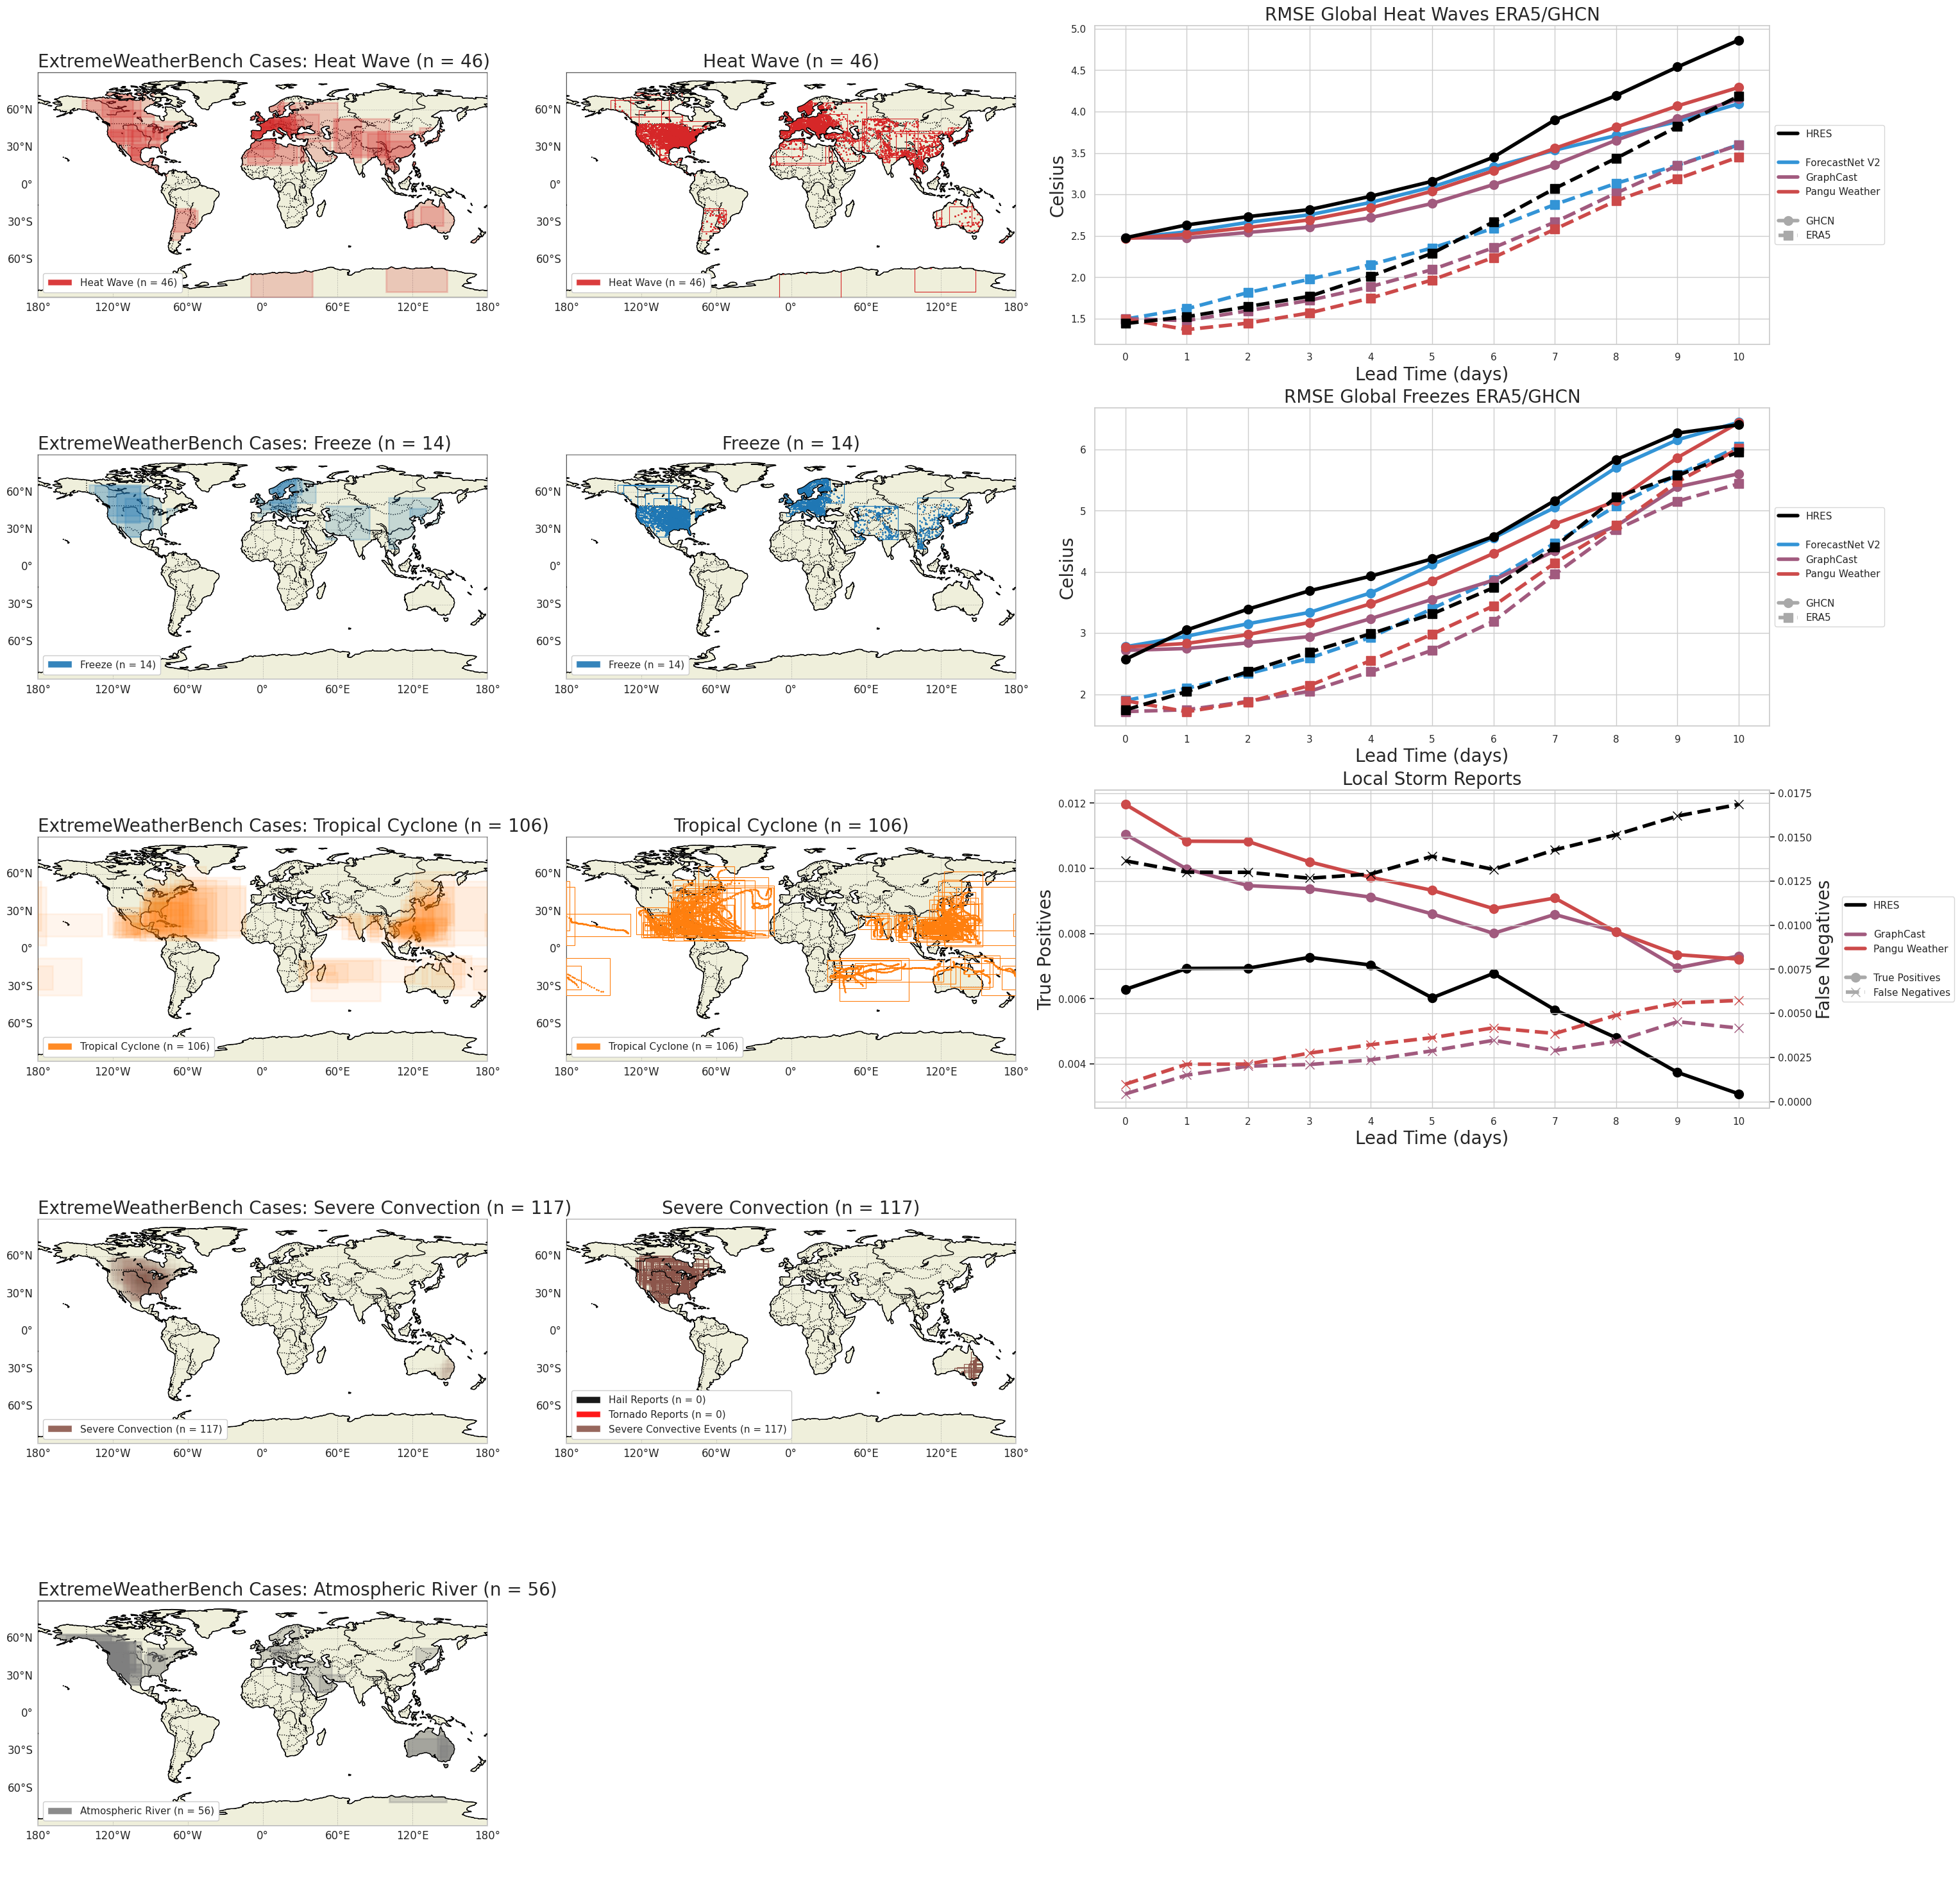

In [65]:
from matplotlib.gridspec import GridSpec

n_rows = 5
n_cols = 3
figsize = (10 * n_cols, 6 * n_rows)
print(figsize)

# Create figure first
fig = plt.figure(figsize=figsize)

# Use GridSpec for better control over subplot sizes, especially with mixed cartopy/regular subplots
# Make column 2 wider for line plots (width_ratios: col0, col1, col2)
# Use negative hspace to compress vertical spacing (negative values allow overlap)
gs = GridSpec(n_rows, n_cols, figure=fig, 
              left=0.05, right=0.95, top=0.98, bottom=0.02,
              wspace=0.15, hspace=0.2,  
              width_ratios=[1, 1, 1.5])  # Make column 2 (index 2) 1.5x wider

# Create a grid of subplots - specify which ones should use cartopy
# Example: cartopy_subplots = [(0, 0), (1, 0)] means rows 0,1 in column 0 use cartopy
# You can modify this list to specify which subplots need cartopy projections
cartopy_subplots = [(0,0), (1,0), (2,0), (3,0), (4,0), (0,1), (1,1), (2,1), (3,1), (4,1)]  # Add tuples like (row, col) for subplots that need cartopy

# Create all subplots
axs = []
for i in range(n_rows):
    row = []
    for j in range(n_cols):
        if (i, j) in cartopy_subplots:
            # Create cartopy subplot
            ax = fig.add_subplot(gs[i, j], projection=ccrs.PlateCarree())
        else:
            # Create regular matplotlib subplot
            ax = fig.add_subplot(gs[i, j])
        row.append(ax)
    axs.append(row)

# Convert to numpy array for easier indexing (matching plt.subplots behavior)
axs = np.array(axs)

# the left hand column of figure one shows all of the cases for each event type
# plot the cases for each event type
print("plotting the cases for each event type")
pp.plot_all_cases(
    ewb_cases,
    event_type="heat_wave",
    fill_boxes=True,
    ax=axs[0, 0],
)
pp.plot_all_cases(
    ewb_cases,
    event_type="freeze",
    fill_boxes=True,
    ax=axs[1, 0],
)
pp.plot_all_cases(
    ewb_cases,
    event_type="tropical_cyclone",
    fill_boxes=True,
    ax=axs[2, 0],
)
pp.plot_all_cases(
    ewb_cases,
    event_type="severe_convection",
    fill_boxes=True,
    ax=axs[3, 0],
)
pp.plot_all_cases(
    ewb_cases,
    event_type="atmospheric_river",
    fill_boxes=True,
    ax=axs[4, 0],
)

# the next column of figure one shows the cases for each event type with the obs
# plot the cases for each event type with the observations
pp.plot_all_cases_and_obs(
    ewb_cases,
    event_type="heat_wave",
    targets=case_operators_with_targets_established,
    ax=axs[0, 1],
)
pp.plot_all_cases_and_obs(
    ewb_cases,
    event_type="freeze",
    targets=case_operators_with_targets_established,
    ax=axs[1, 1],
)
pp.plot_all_cases_and_obs(
    ewb_cases,
    event_type="tropical_cyclone",
    targets=case_operators_with_targets_established,
    ax=axs[2, 1],
)
pp.plot_all_cases_and_obs(
    ewb_cases,
    event_type="severe_convection",
    targets=case_operators_with_targets_established,
    ax=axs[3, 1],
)
# pp.plot_all_cases_and_obs(
#     ewb_cases,
#     event_type="atmospheric_river",
#     targets=case_operators_with_targets_established,
#     ax=axs[4, 1],
# )

# the next column of figure 1 shows how useful the target obs are for each event
pp.plot_results_by_metric(data=heat_data, settings=heat_settings, 
    title='RMSE Global Heat Waves ERA5/GHCN', show_all_in_legend=False, ax=axs[0,2])

pp.plot_results_by_metric(data=freeze_data, settings=freeze_settings, 
    title='RMSE Global Freezes ERA5/GHCN', show_all_in_legend=False, ax=axs[1,2])

pp.plot_two_results_by_metric(data1=severe_data_tp, data2=severe_data_fn, 
    settings1=severe_settings_tp, settings2=severe_settings_fn, 
    y_label1='True Positives', y_label2='False Negatives',
    title='Local Storm Reports', show_all_in_legend=False, ax=axs[2,2])

# for now, make the last row of column 2 empty
axs[3,2].axis('off')
axs[4,1].axis('off')
axs[4,2].axis('off')

# Set aspect ratio for non-cartopy subplots to prevent scaling issues
# For column 2 (line plots), use a wider aspect ratio
# for i in range(n_rows):
#     for j in range(n_cols):
#         if (i, j) not in cartopy_subplots:
#             # Make line plots in column 2 wider (rectangular)
#             # Adjust this ratio as needed - smaller number = wider plot
#             axs[i, j].set_aspect(5)  
#         else:
#             # Allow other regular subplots to be flexible
#             axs[i, j].set_aspect('auto')

# Use subplots_adjust to further compress vertical spacing after plots are created
fig.subplots_adjust(hspace=0.0)  # Set hspace to 0 to remove all vertical spacing

fig.savefig(basepath + "saved_data/figure1.png", dpi=600)